# The SARS-CoV-2 (Covid-19) epidemic

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

pd.options.mode.chained_assignment = None  # default='warn'

The data on the SARS-CoV-2 (Covid-19) epidemic are available from the Web site of the [Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE)](https://systems.jhu.edu/). We download them as a file in CSV format, in which each line corresponds to a state in the observation period. Only the complete dataset, starting on 22nd Jenuary 2020 and ending with a recent week, is available for download.

In [2]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

This is the documentation of the data from [the download site](https://github.com/CSSEGISandData/COVID-19):

| Columns name  | Description                                                                                                               |
|--------------|---------------------------------------------------------------------------------------------------------------------------|
| `Province/State`       |                                                                |
| `Country/Region`  |   |
| `Lat`        |                                                    |
| `Long`    |                                                             |
| `839 x Dates`     |                                                             |


In [3]:
raw_data = pd.read_csv(data_url)
raw_data

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN              Antarctica   
6                                             NaN     Antigua and Barbuda   
7                                             NaN               Argentina   
8                                             NaN                 Armenia   
9                    Australian Capital Territory               Australia   
10                                New South Wales               Australia   
11                             Northern Territory               Australia   
12                                     Queensland               Australia   
13                                South Australia               Australia   
14                                       Tasmania               Australia   
15                                       Victoria               Australia   
16                              Western Australia               Australia   
17                                            NaN                 Austria   
18                                            NaN              Azerbaijan   
19                                            NaN                 Bahamas   
20                                            NaN                 Bahrain   
21                                            NaN              Bangladesh   
22                                            NaN                Barbados   
23                                            NaN                 Belarus   
24                                            NaN                 Belgium   
25                                            NaN                  Belize   
26                                            NaN                   Benin   
27                                            NaN                  Bhutan   
28                                            NaN                 Bolivia   
29                                            NaN  Bosnia and Herzegovina   
..                                            ...                     ...   
254                                           NaN                 Tunisia   
255                                           NaN                  Turkey   
256                                           NaN                      US   
257                                           NaN                  Uganda   
258                                           NaN                 Ukraine   
259                                           NaN    United Arab Emirates   
260                                      Anguilla          United Kingdom   
261                                       Bermuda          United Kingdom   
262                        British Virgin Islands          United Kingdom   
263                                Cayman Islands          United Kingdom   
264                               Channel Islands          United Kingdom   
265                   Falkland Islands (Malvinas)          United Kingdom   
266                                     Gibraltar          United Kingdom   
267                                      Guernsey          United Kingdom   
268                                   Isle of Man          United Kingdom   
269                                        Jersey          United Kingdom   
270                                    Montserrat          United Kingdom   
271  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
272                      Turks and Caicos Islands          United Kingdom   
273                                           NaN          United Kingdom   
274                            

In [6]:
no_province = raw_data[pd.isnull(raw_data['Province/State'])]
no_province['country_and_state'] = no_province['Country/Region'] 
no_province_sorted = no_province.set_index('country_and_state').sort_index()
no_province_sorted

Province/State          Country/Region        Lat  \
country_and_state                                                          
Afghanistan                       NaN             Afghanistan  33.939110   
Albania                           NaN                 Albania  41.153300   
Algeria                           NaN                 Algeria  28.033900   
Andorra                           NaN                 Andorra  42.506300   
Angola                            NaN                  Angola -11.202700   
Antarctica                        NaN              Antarctica -71.949900   
Antigua and Barbuda               NaN     Antigua and Barbuda  17.060800   
Argentina                         NaN               Argentina -38.416100   
Armenia                           NaN                 Armenia  40.069100   
Austria                           NaN                 Austria  47.516200   
Azerbaijan                        NaN              Azerbaijan  40.143100   
Bahamas                           NaN                 Bahamas  25.025885   
Bahrain                           NaN                 Bahrain  26.027500   
Bangladesh                        NaN              Bangladesh  23.685000   
Barbados                          NaN                Barbados  13.193900   
Belarus                           NaN                 Belarus  53.709800   
Belgium                           NaN                 Belgium  50.833300   
Belize                            NaN                  Belize  17.189900   
Benin                             NaN                   Benin   9.307700   
Bhutan                            NaN                  Bhutan  27.514200   
Bolivia                           NaN                 Bolivia -16.290200   
Bosnia and Herzegovina            NaN  Bosnia and Herzegovina  43.915900   
Botswana                          NaN                Botswana -22.328500   
Brazil                            NaN                  Brazil -14.235000   
Brunei                            NaN                  Brunei   4.535300   
Bulgaria                          NaN                Bulgaria  42.733900   
Burkina Faso                      NaN            Burkina Faso  12.238300   
Burma                             NaN                   Burma  21.916200   
Burundi                           NaN                 Burundi  -3.373100   
Cabo Verde                        NaN              Cabo Verde  16.538800   
...                               ...                     ...        ...   
Summer Olympics 2020              NaN    Summer Olympics 2020  35.649100   
Suriname                          NaN                Suriname   3.919300   
Sweden                            NaN                  Sweden  60.128161   
Switzerland                       NaN             Switzerland  46.818200   
Syria                             NaN                   Syria  34.802075   
Taiwan*                           NaN                 Taiwan*  23.700000   
Tajikistan                        NaN              Tajikistan  38.861000   
Tanzania                          NaN                Tanzania  -6.369028   
Thailand                          NaN                Thailand  15.870032   
Timor-Leste                       NaN             Timor-Leste  -8.874217   
Togo                              NaN                    Togo   8.619500   
Tonga                             NaN                   Tonga -21.179000   
Trinidad and Tobago               NaN     Trinidad and Tobago  10.691800   
Tunisia                           NaN                 Tunisia  33.886917   
Turkey                            NaN                  Turkey  38.963700   
US                                NaN                      US  40.000000   
Uganda                            NaN                  Uganda   1.373333   
Ukraine                           NaN                 Ukraine  48.379400   
United Arab Emirates              NaN    United Arab Emirates  23.424076   
United Kingdom                    NaN          United Kingdom  55.37810

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


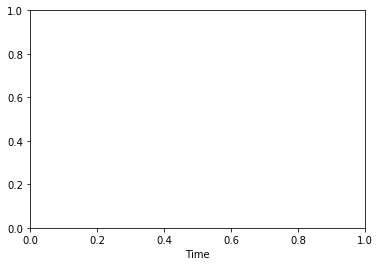

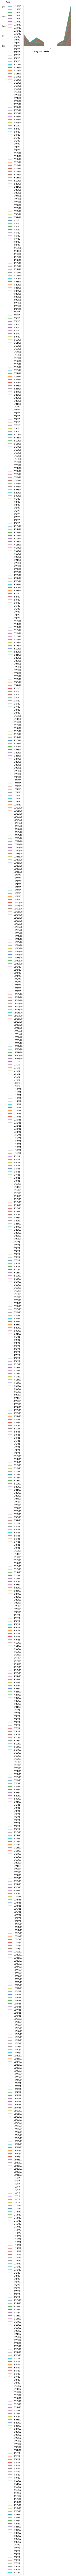

In [13]:
#  Belgium, China (all provinces except Hong Kong), China, Hong-Kong, France except Dom/Tom, Germany, Iran, Italy, Japan, Korea South, Netherlands without the colonies, Portugal, Spain, United Kingdom without the colonies, US.
country = ['Belgium', 'Hong-Kong', 'Germany', 'Iran', 'Italy', 'Japan', 'Korea South', 'Portugal', 'Spain', 'US']
graph = no_province_sorted.loc[country, '1/22/20':]
plt.xlabel("Time")
graph.plot()

In [ ]:
province = raw_data[pd.notnull(raw_data['Province/State'])]
raw_data['country_and_state'] = province['Country/Region'] + '-' + province['Province/State']
raw_data

In [ ]:
data = pd.merge(no_province,province)
data

In [ ]:
if pd.isnull(raw_data['Province/State']):
    raw_data['country_and_state'] = raw_data['Country/Region'] 
else:
    raw_data['country_and_state'] = raw_data['Country/Region'] + '-' + raw_data['Province/State']
raw_data['country_and_state']


In [ ]:
raw_data['country_and_state'] = raw_data['Country/Region'] + raw_data['Province/State']
raw_data['country_and_state']

In [ ]:
sorted_data = raw_data.set_index('country_and_state').sort_index()
sorted_data

In [ ]:
belgium = sorted_data.loc['Belgium', '1/22/20':]
plt.xlabel("Time")
belgium.plot()

In [ ]:
sorted_data['country_and_state'] = sorted_data['Country/Region'] + ' - ' + sorted_data['Province/State']
sorted_data

In [ ]:
ilaria = 'ilaria' + ' ' + 'moschetti'
ilaria